In [1]:
import os
import csv
import pandas
import subprocess
import numpy as np
import pysindy as ps
from numpy import diff
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import FormatStrFormatter

pandas.set_option("display.precision", 2)

feature_names = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'ux', 'uy', 'uz']
target_names = ['dx/dt', 'dy/dt', 'dz/dt', 'dvx/dt', 'dvy/dt', 'dvz/dt']

In [2]:
# run matlab from python via cmd
MatScriptAbsDir = "C:\\Users\\vvh19\\OneDrive\\Documents\\GitHub\\SatRelMDPC\\src\\matlab\\RelOrbSim\\MAIN.m"
RunMatlabScript_Flag = 0;

if RunMatlabScript_Flag == 1:
    C1 = 'echo Executing Shell Script! && echo: && echo Matlab Output: && echo: && '
    C2 = 'matlab -noFigureWindows -nosplash -nodesktop -batch "run('
    C3 = "'" + MatScriptAbsDir + "'"
    C4 = '); exit;" && echo: && echo Windows Shell Closing! && exit'
    command = C1 + C2 + C3 + C4

    print("Given Command:")
    print(command)
    print("")

    out = subprocess.run(command, shell=True,
    capture_output=True, text=True)
    print(out.stdout)
    

In [3]:
# Import from CSV
CSV_dir = "C:/Users/vvh19/OneDrive/Documents/GitHub/SatRelMDPC/src/matlab/RelOrbSim/Export/"
DataInSI_flag = 1

with open(CSV_dir + 'times.csv', newline='') as csvfile:  
    times = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'a_f_RTH.csv', newline='') as csvfile:  
    a_f_RTH = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho.csv', newline='') as csvfile:  
    rho = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho_dot.csv', newline='') as csvfile:  
    rho_dot = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho_dotdot.csv', newline='') as csvfile:  
    rho_dotdot = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'kep_T.csv', newline='') as csvfile:  
    kep_T = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'kep_C.csv', newline='') as csvfile:  
    kep_C = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'params_T.csv', newline='') as csvfile:  
    params_T = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'params_C.csv', newline='') as csvfile:  
    params_C = np.array(list(csv.reader(csvfile))).astype(float)
    
# Convert to S.I Units
if DataInSI_flag == 1:
    a_f_RTH = a_f_RTH*1e3
    rho = rho*1e3
    rho_dot = rho_dot*1e3
    rho_dotdot = rho_dotdot*1e3
    kep_T[:,0] = kep_T[:,0]*1e3
    kep_C[:,0] = kep_C[:,0]*1e3

[Text(0.5, 0, '$t~[s]$'), Text(0, 0.5, '$\\omega~[rad/s]$')]

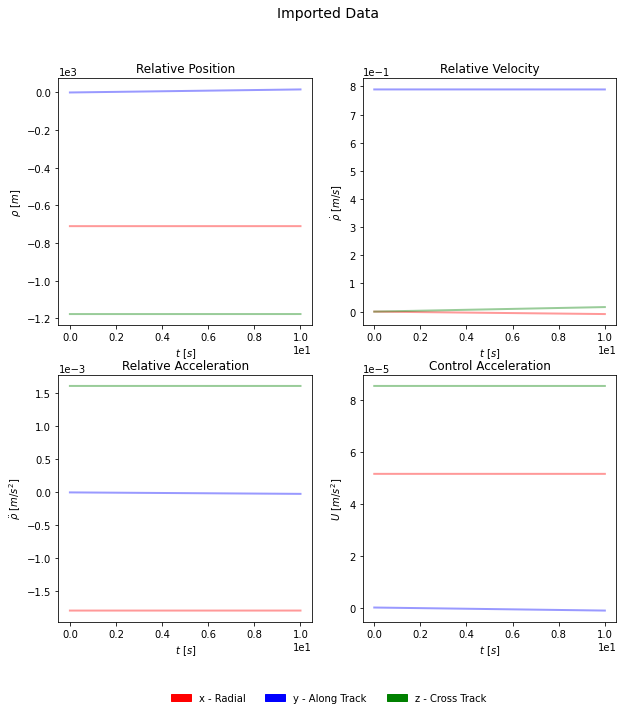

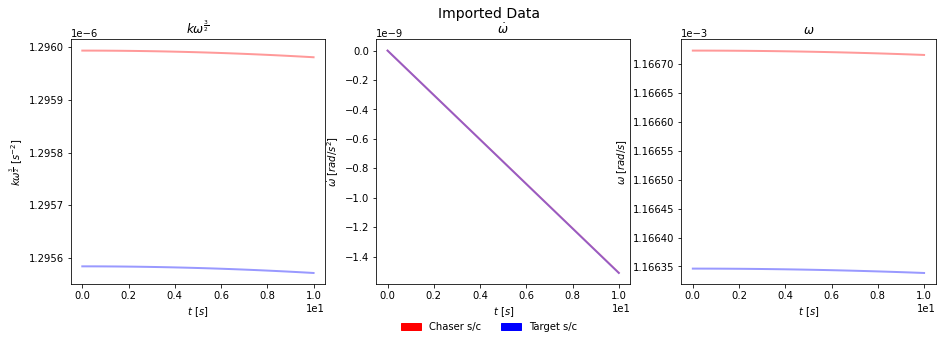

In [4]:
# Plot Imported Data
plot_kws = dict(linewidth=2)
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
green_patch = mpatches.Patch(color='green')

# figure 1: rho, rho_dot, rho_dotdot, a_f_RTH
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Imported Data', fontsize=14)
fig.legend(handles=[red_patch, blue_patch, green_patch],\
           labels=('x - Radial','y - Along Track','z - Cross Track'),\
           loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 0))

axs[0,0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0,0].plot(times, rho[:, 0], "r", alpha=0.4, **plot_kws)
axs[0,0].plot(times, rho[:, 1], "b", alpha=0.4, **plot_kws)
axs[0,0].plot(times, rho[:, 2], "g", alpha=0.4, **plot_kws)
axs[0,0].set_title('Relative Position')
if DataInSI_flag == 1:
    axs[0,0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[m]$")
else:
    axs[0,0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[km]$")
# axes[0].grid(True)

axs[0,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0,1].plot(times, rho_dot[:, 0], "r", alpha=0.4, **plot_kws)
axs[0,1].plot(times, rho_dot[:, 1], "b", alpha=0.4, **plot_kws)
axs[0,1].plot(times, rho_dot[:, 2], "g", alpha=0.4, **plot_kws)
axs[0,1].set_title('Relative Velocity')
if DataInSI_flag == 1:
    axs[0,1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\rho}~[m/s]$")
else:
    axs[0,1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\rho}~[m/s]$")

axs[1,0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1,0].plot(times, rho_dotdot[:, 0], "r", alpha=0.4, **plot_kws)
axs[1,0].plot(times, rho_dotdot[:, 1], "b", alpha=0.4, **plot_kws)
axs[1,0].plot(times, rho_dotdot[:, 2], "g", alpha=0.4, **plot_kws)
axs[1,0].set_title('Relative Acceleration')
if DataInSI_flag == 1:
    axs[1,0].set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}~[m/s^2]$")
else:
    axs[1,0].set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}~[km/s^2]$")

axs[1,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1,1].plot(times, a_f_RTH[:, 0], "r", alpha=0.4, **plot_kws)
axs[1,1].plot(times, a_f_RTH[:, 1], "b", alpha=0.4, **plot_kws)
axs[1,1].plot(times, a_f_RTH[:, 2], "g", alpha=0.4, **plot_kws)
axs[1,1].set_title('Control Acceleration')
if DataInSI_flag == 1:
    axs[1,1].set(xlabel="$t~[s]$", ylabel="$U~[m/s^2]$")
else:
    axs[1,1].set(xlabel="$t~[s]$", ylabel="$U~[km/s^2]$")


# figure 2: params_T, params_C
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15.5, 4.5))
fig.suptitle('Imported Data', fontsize=14)
fig.legend(handles=[red_patch, blue_patch],\
           labels=('Chaser s/c','Target s/c'),\
           loc='lower center', frameon=False, ncol=2, bbox_to_anchor=(0.5, -0.05))

axs[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0].plot(times, params_C[:, 0], "r", alpha=0.4, **plot_kws)
axs[0].plot(times, params_T[:, 0], "b", alpha=0.4, **plot_kws)
axs[0].set_title(r"$k\omega^\frac{3}{2}$")
axs[0].set(xlabel="$t~[s]$", ylabel=r"$k\omega^\frac{3}{2}~[s^{-2}]$")
# axes[0].grid(True)

axs[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1].plot(times, params_C[:, 1], "r", alpha=0.4, **plot_kws)
axs[1].plot(times, params_T[:, 1], "b", alpha=0.4, **plot_kws)
axs[1].set_title(r"$\dot{\omega}$")
axs[1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\omega}~[rad/s^2]$")

axs[2].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[2].plot(times, params_C[:, 2], "r", alpha=0.4, **plot_kws)
axs[2].plot(times, params_T[:, 2], "b", alpha=0.4, **plot_kws)
axs[2].set_title(r"$\omega$")
axs[2].set(xlabel="$t~[s]$", ylabel=r"$\omega~[rad/s]$")



[Text(0.5, 0, '$t~[s]$'),
 Text(0, 0.5, '$\\widehat{k\\omega}^\\frac{3}{2}~[s^{-2}]$')]

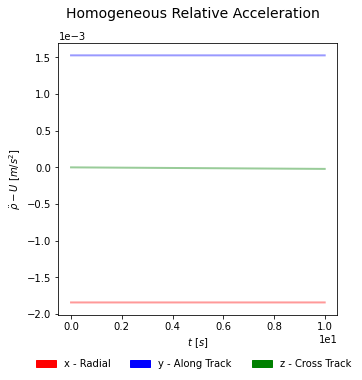

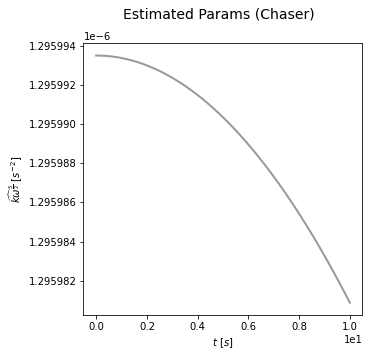

In [5]:
# Estimate Params from State Measurements
rho_dotdot_homogenous = rho_dotdot - a_f_RTH

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Homogeneous Relative Acceleration", fontsize=14)
fig.legend(handles=[red_patch, blue_patch, green_patch],\
           labels=('x - Radial','y - Along Track','z - Cross Track'),\
           loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, -0.05))

ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, rho_dotdot_homogenous[:,0], "r", alpha=0.4, **plot_kws)
ax.plot(times, rho_dotdot_homogenous[:,1], "g", alpha=0.4, **plot_kws)
ax.plot(times, rho_dotdot_homogenous[:,2], "b", alpha=0.4, **plot_kws)
if DataInSI_flag == 1:
    ax.set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}-U~[m/s^2]$")
else:
    ax.set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}-U~[km/s^2]$")
    
est_kw32 = -1*np.divide(rho_dotdot_homogenous[:,2], rho[:,2])

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated Params (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, est_kw32, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$\widehat{k\omega}^\frac{3}{2}~[s^{-2}]$")

In [6]:
# Experimental Assumption --> "h" is known
MU = 3.98600433e+5 # From DE405
P_Chaser_est = np.multiply( kep_C[:,0], ( 1 - np.multiply(kep_C[:,1], kep_C[:,1]) ) )
H_Chaser_est = np.sqrt(MU*P_Chaser_est)
W_est = np.divide(est_kw32, (MU / H_Chaser_est**(3/2)))**(2/3)
R_est = np.sqrt(np.divide(H_Chaser_est, W_est))

Times = times.reshape(-1)
DT = Times[1] - Times[0]
R_dot_est = np.gradient(R_est, Times)
W_dot_est = (-2/MU)*np.multiply(H_Chaser_est, est_kw32)


[Text(0.5, 0, '$t~[s]$'), Text(0, 0.5, '$dw~[km/s]$')]

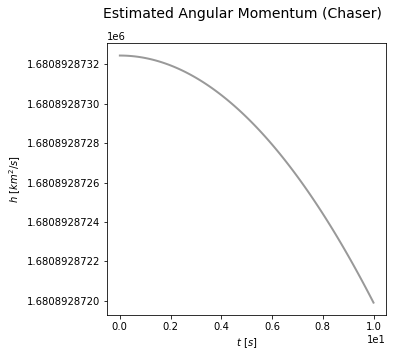

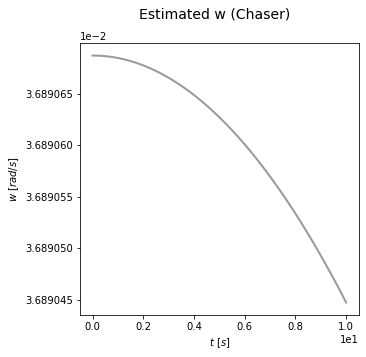

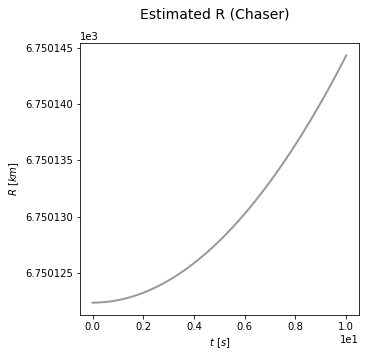

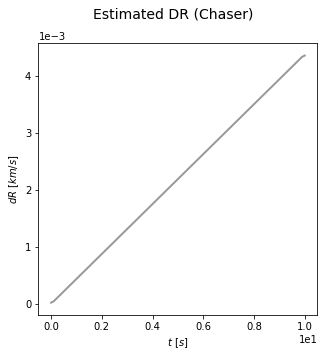

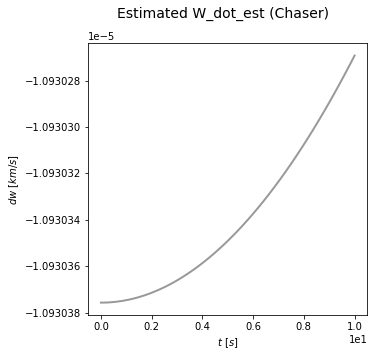

In [7]:
fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated Angular Momentum (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, H_Chaser_est, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$h~[km^2/s]$")

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated w (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, W_est, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$w~[rad/s]$")

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated R (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, R_est, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$R~[km]$")

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated DR (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, R_dot_est, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$dR~[km/s]$")

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated W_dot_est (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, W_dot_est, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$dw~[km/s]$")

In [8]:
est_kw32_mean = np.mean(est_kw32)
est_kw32_median = np.median(est_kw32)
print(np.mean(est_kw32))
print(np.median(est_kw32))
print("")

est_W_mean = np.mean(W_est)
est_W_median = np.median(W_est)
print(np.mean(W_est))
print(np.median(W_est))
print("")

est_dW_mean = np.mean(W_dot_est)
est_dW_median = np.median(W_dot_est)
print(np.mean(W_est))
print(np.median(W_est))
print("")

measured_mean_kw32 = est_kw32_median
measured_mean_W = est_W_median
measured_mean_dW = est_dW_median

# Formula
    # ax -> (2*kw3_2 + w^2)*x,          dw*y,                0             0        2*w*vy,     1     0     0
    # ay ->      -dw*x,            (w^2 - kw3_2)*y,          0          -2*w*vx,       0        0     1     0
    # az ->        0                      0              -(kw3_2)*z,       0           0        0     0     1

    
k1 = 2*measured_mean_kw32 + measured_mean_W**2   # (2*kw3_2 + w^2)
k2 = measured_mean_W**2 - measured_mean_kw32     # ((w^2 - kw3_2)
k3 = -measured_mean_kw32                         # -(kw3_2)
k4 = measured_mean_dW                            # (dw)
k5 = 2*measured_mean_W                           # (2*w)

initial_guess_trial = np.array([[    0,     0,     0,     1,     0,     0,     0,     0,     0],
                                [    0,     0,     0,     0,     1,     0,     0,     0,     0],
                                [    0,     0,     0,     0,     0,     1,     0,     0,     0],
                                [   k1,    k4,     0,     0,     0,    k5,     1,     0,     0],
                                [  -k4,    k2,     0,     0,   -k5,     0,     0,     1,     0],
                                [    0,     0,    k3,     0,     0,     0,     0,     0,     1]])

Sys_A = pandas.DataFrame(initial_guess_trial, columns=feature_names, index=target_names)
print("Initial Guess System LTI Matrix --> Estimated From Measurements:")
print("")
print(Sys_A)
print("")

1.2959892758565472e-06
1.2959903488351962e-06

0.0368906066315907
0.03689062699567314

0.0368906066315907
0.03689062699567314

Initial Guess System LTI Matrix --> Estimated From Measurements:

               x         y         z   vx    vy    vz   ux   uy   uz
dx/dt   0.00e+00  0.00e+00  0.00e+00  1.0  0.00  0.00  0.0  0.0  0.0
dy/dt   0.00e+00  0.00e+00  0.00e+00  0.0  1.00  0.00  0.0  0.0  0.0
dz/dt   0.00e+00  0.00e+00  0.00e+00  0.0  0.00  1.00  0.0  0.0  0.0
dvx/dt  1.36e-03 -1.09e-05  0.00e+00  0.0  0.00  0.07  1.0  0.0  0.0
dvy/dt  1.09e-05  1.36e-03  0.00e+00  0.0 -0.07  0.00  0.0  1.0  0.0
dvz/dt  0.00e+00  0.00e+00 -1.30e-06  0.0  0.00  0.00  0.0  0.0  1.0



In [9]:
# Estimation of System Matrix --> Estimate Params
# Structure the data arrays
X = np.concatenate((rho, rho_dot), axis=1)
X_dot = np.concatenate((rho_dot, rho_dotdot), axis=1)
T = times.reshape(-1) # 0 D Array

# ToDo: Split data into train and test sets
x_train = X
t_train = T
Inputs_train = a_f_RTH
x_dot_precomputed = X_dot
N_ensembles = 150

dt = (t_train[1]-t_train[0])
identity_library = ps.IdentityLibrary()
identity_library.fit(np.concatenate((x_train, Inputs_train), axis=1))

# differentiation_method = ps.FiniteDifference(order=4) # Good
differentiation_method = ps.SmoothedFiniteDifference(smoother_kws={'window_length': 5}, order=6) # Better

###############################################################################
# NEED TO IMPOSE W>0? 
# Initial guess only to try and impose sign of w
# initial_guess_trial = np.array([[    0,     0,     0,     1,     0,     0,     0,     0,     0],
#                                 [    0,     0,     0,     0,     1,     0,     0,     0,     0],
#                                 [    0,     0,     0,     0,     0,     1,     0,     0,     0],
#                                 [    0,     0,     0,     0,     0,     1,     1,     0,     0],
#                                 [    0,     0,     0,     0,    -1,     0,     0,     1,     0],
#                                 [    0,     0,     0,     0,     0,     0,     0,     0,     1]])


# Maybe impose calculated value of kw32(mean) as a constraint? Done, I think
###############################################################################

n_features = identity_library.n_output_features_

# Set constraints
n_targets = x_train.shape[1]

# constraint_rhs = np.array([1,1,1,1,1,1,0,0,0, -measured_mean_kw32, 2*measured_mean_W])
constraint_rhs = np.array([1,1,1,1,1,1,0,0,0])

# One row per constraint, one column per coefficient
constraint_lhs = np.zeros((constraint_rhs.size, n_targets * n_features))

# Format:
# constraint_lhs[constraint_number, coefficient_of_which_feature + contribution_to_which_target*n_features] = coefficient_factor
# f:feature, t:target, C:coefficient --> C[f1/t3] = coefficient for contribution of f1 in t3

# constraint_lhs[Constraint_number_in_[constraint_rhs], {f?} + {t?}*n_features] = coefficient_multiplier  # c1

# For vx = ........
constraint_lhs[0, 3+0*n_features] = 1.0 # vx
# For vy = ........
constraint_lhs[1, 4+1*n_features] = 1.0 # vy
# For vz = ........
constraint_lhs[2, 5+2*n_features] = 1.0 # vz
# For ax = ........
constraint_lhs[3, 6+3*n_features] = 1.0 # ux
# For ay = ........
constraint_lhs[4, 7+4*n_features] = 1.0 # uy
# For az = ........
constraint_lhs[5, 8+5*n_features] = 1.0 # uz

# For Combined Constraints
# 1*C(ax/y) + 1*C(ay/x) = 0
constraint_lhs[6, 1+3*n_features] = 1.0 # y
constraint_lhs[6, 0+4*n_features] = 1.0 # x
# 1*C(ax/vy) + 1*C(ay/vx) = 0
constraint_lhs[7, 4+3*n_features] = 1.0 # vy
constraint_lhs[7, 3+4*n_features] = 1.0 # vx
# 1*C(ax/x) + -1*C(ay/y) + 3*C(az/z)= 0
constraint_lhs[8, 0+3*n_features] =  1.0 # x
constraint_lhs[8, 1+4*n_features] = -1.0 # y
constraint_lhs[8, 2+5*n_features] =  3.0 # z

# For mean kw32 as constraint
# constraint_lhs[9, 2+5*n_features] =  1.0 # z

# For mean W as aconstraint
# constraint_lhs[10, 4+3*n_features] = 1.0 # vy

s = 1e30;
# Each row corresponds to a measurement variable and each column to a function 
# from the feature library
# States                  x       y       z       dx      dy      dz     ux     uy     uz
a_thresholds = np.array([[s,      s,      s,      0,      s,      s,     s,     s,      s],       # vx
                         [s,      s,      s,      s,      0,      s,     s,     s,      s],       # vy
                         [s,      s,      s,      s,      s,      0,     s,     s,      s],       # vz
                         [1e-11,  1e-11,  s,      s,      1e-11,  s,     0,     s,      s],       # ax
                         [1e-11,  1e-11,  s,      1e-11,  s,      s,     s,     0,      s],       # ay
                         [s,      s,      1e-11,  s,      s,      s,     s,     s,      0]     ]) # az

csr3_optimizer = ps.ConstrainedSR3(constraint_rhs=constraint_rhs, 
                                   constraint_lhs=constraint_lhs,
                                   thresholder="weighted_l1",
                                   nu=1,
                                   tol=1e-16,
                                   max_iter=10,
                                   normalize_columns=False,
                                   # initial_guess=initial_guess_trial,
                                   # trimming_fraction=0.1,
                                   fit_intercept=True,
                                   inequality_constraints = False,
                                   thresholds=a_thresholds,
)

# Fit The Model
model = ps.SINDy(feature_names = feature_names,
                 optimizer = csr3_optimizer,
                 feature_library = identity_library,
                 differentiation_method=differentiation_method,
)
model.fit(x_train, 
          t=dt, 
          # x_dot=x_dot_precomputed,
          u=Inputs_train,
          # library_ensemble=True,
          ensemble=True,
          n_models=N_ensembles,
          # n_candidates_to_drop=1, 
          unbias=True
          # quiet=True
)
# Formula
    # ax -> (2*kw3_2 + w^2)*x,          dw*y,                0             0        2*w*vy,     1     0     0
    # ay ->      -dw*x,            (w^2 - kw3_2)*y,          0          -2*w*vx,       0        0     1     0
    # az ->        0                      0              -(kw3_2)*z,       0           0        0     0     1

# Model_Coefs = model.coef_list
Model_Coefs = model.coefficients()

Sys_A = pandas.DataFrame(Model_Coefs, columns=feature_names, index=target_names)
print("Estimated System LTI Matrix --> Ensemble Bagged (Default Method):")
print("")
print(Sys_A)
print("")

Estimated System LTI Matrix --> Ensemble Bagged (Default Method):

               x         y         z    vx    vy   vz   ux   uy   uz
dx/dt   0.00e+00 -0.00e+00  0.00e+00  1.00  0.00  0.0  0.0  0.0  0.0
dy/dt   0.00e+00  0.00e+00 -0.00e+00  0.00  1.00 -0.0  0.0 -0.0  0.0
dz/dt   0.00e+00 -0.00e+00  0.00e+00 -0.00  0.00  1.0  0.0 -0.0  0.0
dvx/dt  1.11e-05 -4.65e-08 -0.00e+00  0.00 -0.02 -0.0  1.0 -0.0  0.0
dvy/dt  4.65e-08  1.84e-05 -0.00e+00  0.02 -0.00 -0.0 -0.0  1.0 -0.0
dvz/dt -0.00e+00 -0.00e+00  2.43e-06  0.00  0.00  0.0  0.0 -0.0  1.0



In [10]:
# Estimate Params from Estimated System Matrix (Model Coeficients List - for each ensemble estimate params)
def SysMat2Params(Model_Coefs):
    estimate_kw32 = -Model_Coefs[5,2]
    estimate_w = (Model_Coefs[3,4] - Model_Coefs[4,3])/4
    estimate_wdot = (Model_Coefs[3,1] - Model_Coefs[4,0])/2
    return (estimate_kw32, estimate_wdot, estimate_w)

print(SysMat2Params(Model_Coefs))

(-2.425092717476486e-06, -4.6534629701701076e-08, -0.008244343114687327)


[Text(0.5, 0, '$Ensemble~Idx$'), Text(0, 0.5, '$\\omega~[rad/s]$')]

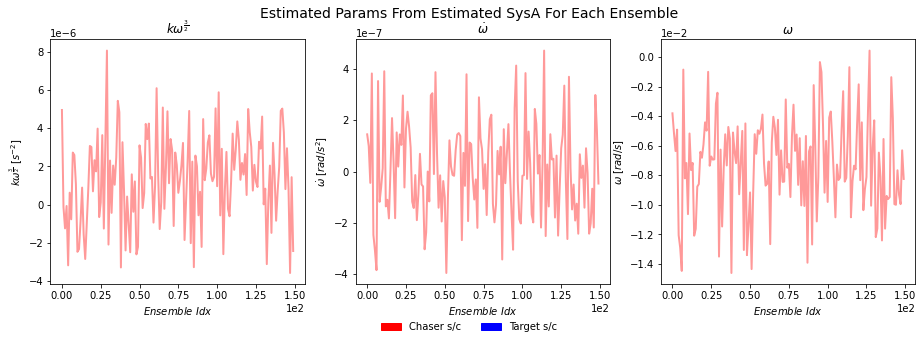

In [11]:
estimate_kw32 = []
estimate_wdot = []
estimate_w = []

for ensembleIDX in range(len(model.coef_list)):
    (estim_kw32, estim_wdot, estim_w) = SysMat2Params(model.coef_list[ensembleIDX])
    estimate_kw32.append(estim_kw32)
    estimate_wdot.append(estim_wdot)
    estimate_w.append(estim_w)
    
estimate_params_C = np.stack((estimate_kw32, estimate_wdot, estimate_w), axis=1)

# figure 1: params_C
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15.5, 4.5))
fig.suptitle('Estimated Params From Estimated SysA For Each Ensemble', fontsize=14)
fig.legend(handles=[red_patch, blue_patch],\
           labels=('Chaser s/c','Target s/c'),\
           loc='lower center', frameon=False, ncol=2, bbox_to_anchor=(0.5, -0.05))

axs[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0].plot(estimate_params_C[:, 0], "r", alpha=0.4, **plot_kws)
axs[0].set_title(r"$k\omega^\frac{3}{2}$")
axs[0].set(xlabel="$Ensemble~Idx$", ylabel=r"$k\omega^\frac{3}{2}~[s^{-2}]$")
# axes[0].grid(True)

axs[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1].plot(estimate_params_C[:, 1], "r", alpha=0.4, **plot_kws)
axs[1].set_title(r"$\dot{\omega}$")
axs[1].set(xlabel="$Ensemble~Idx$", ylabel=r"$\dot{\omega}~[rad/s^2]$")

axs[2].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[2].plot(estimate_params_C[:, 2], "r", alpha=0.4, **plot_kws)
axs[2].set_title(r"$\omega$")
axs[2].set(xlabel="$Ensemble~Idx$", ylabel=r"$\omega~[rad/s]$")

# Use bagging functions to shortlist SysA coefficients based on which 
# ensemble generates least error and standard deviation in simulation

C:\Users\vvh19\AppData\Local\Temp/ipykernel_3456/3232285320.py:3: RuntimeWarning: invalid value encountered in power
  Est_K = np.divide(estimate_params_C[:, 0], (estimate_params_C[:, 2])**1.5)


[Text(0.5, 0, '$Ensemble~Idx$'), Text(0, 0.5, '$k$')]

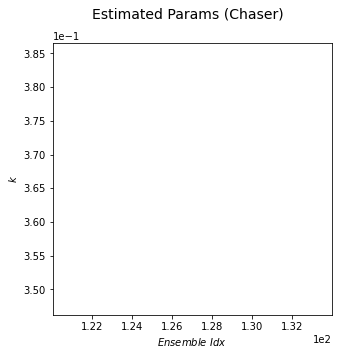

In [12]:
# Check if Estimated K is constant

Est_K = np.divide(estimate_params_C[:, 0], (estimate_params_C[:, 2])**1.5)

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated Params (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(Est_K, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$Ensemble~Idx$", ylabel=r"$k$")

In [13]:
# Estimate System Matrix from Estimated Params 

# function to compute the average of the coefficients,
# weighted by the MSE on the test data.
def weighted_coefficient_average(coef_list, x_test, dt, U, optimizer):
    mse = np.zeros(np.shape(coef_list)[0])
    for i in range(np.shape(coef_list)[0]):
        optimizer.coef_ = np.asarray(coef_list)[i, :, :]
        mse[i] = model.score(x_test, t=dt, u=U, metric=mean_squared_error)
    avg = np.average(coef_list, axis=0, weights=mse)
    coef_subtracted = np.zeros(np.shape(coef_list))
    for i in range(np.shape(coef_list)[0]):
        coef_subtracted[i, :, :] = np.asarray(coef_list)[i, :, :] - avg
    std = np.sqrt(np.average(coef_subtracted ** 2, axis=0, weights=mse))
    return avg, std

e_wavg, e_wstd = weighted_coefficient_average(model.coef_list, x_train, dt, Inputs_train, csr3_optimizer)

# Bagging Via MSE Weighted Average 
Sys_A_e_wavg = pandas.DataFrame(e_wavg, columns=feature_names, index=target_names) # Better Bagging
print("Estimated System LTI Matrix --> Ensemble Weighted MSE(Avg) Bagged:")
print("")
print(Sys_A_e_wavg)
print("")

(estim_kw32_e_wavg, estim_wdot_e_wavg, estim_w_e_wavg) = SysMat2Params(e_wavg)
print("Predicted Params: " + str([estim_kw32_e_wavg, estim_wdot_e_wavg, estim_w_e_wavg])) # Better Bagging


Estimated System LTI Matrix --> Ensemble Weighted MSE(Avg) Bagged:

               x         y         z    vx    vy   vz   ux   uy   uz
dx/dt   0.00e+00  0.00e+00  0.00e+00  1.00  0.00  0.0  0.0  0.0  0.0
dy/dt   0.00e+00  0.00e+00  0.00e+00  0.00  1.00  0.0  0.0  0.0  0.0
dz/dt   0.00e+00  0.00e+00  0.00e+00  0.00  0.00  1.0  0.0  0.0  0.0
dvx/dt  2.77e-05 -7.96e-08  0.00e+00  0.00 -0.02  0.0  1.0  0.0  0.0
dvy/dt  7.96e-08  2.27e-05  0.00e+00  0.02  0.00  0.0  0.0  1.0  0.0
dvz/dt  0.00e+00  0.00e+00 -1.68e-06  0.00  0.00  0.0  0.0  0.0  1.0

Predicted Params: [1.6758937748478567e-06, -7.961262761339835e-08, -0.008831492514742247]


C:\ProgramData\Anaconda3\lib\site-packages\pysindy\pysindy.py:1082: UserWarning: Last time point dropped in simulation because interpolation of control input was used. To avoid this, pass in a callable for u.
  warnings.warn(


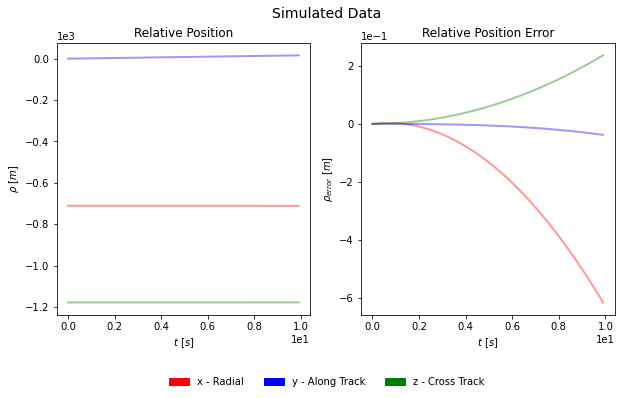

In [14]:
# Simulating Weighted MSE Coefficients:

sim_optimizer = csr3_optimizer
sim_optimizer.coef_ = e_wavg
x0_test_sim = X[0,:]
x_test_sim = model.simulate(x0_test_sim, T, u=Inputs_train)
t_test_sim = T[:-1]

# Error between simulated and imported data and plot
rho_error_sim = x_test_sim - X[:-1,:]

# figure 1: rho_sim, error_rho_sim
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Simulated Data', fontsize=14)
fig.legend(handles=[red_patch, blue_patch, green_patch],\
           labels=('x - Radial','y - Along Track','z - Cross Track'),\
           loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, -0.1))

axs[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0].plot(t_test_sim, x_test_sim[:, 0], "r", alpha=0.4, **plot_kws)
axs[0].plot(t_test_sim, x_test_sim[:, 1], "b", alpha=0.4, **plot_kws)
axs[0].plot(t_test_sim, x_test_sim[:, 2], "g", alpha=0.4, **plot_kws)
axs[0].set_title('Relative Position')
if DataInSI_flag == 1:
    axs[0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[m]$")
else:
    axs[0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[km]$")

    
axs[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1].plot(t_test_sim, rho_error_sim[:, 0], "r", alpha=0.4, **plot_kws)
axs[1].plot(t_test_sim, rho_error_sim[:, 1], "b", alpha=0.4, **plot_kws)
axs[1].plot(t_test_sim, rho_error_sim[:, 2], "g", alpha=0.4, **plot_kws)
axs[1].set_title('Relative Position Error')
if DataInSI_flag == 1:
    axs[1].set(xlabel="$t~[s]$", ylabel=r"$\rho_{error}~[m]$")
else:
    axs[1].set(xlabel="$t~[s]$", ylabel=r"$\rho_{error}~[km]$")
# axes[0].grid(True)
